# What is Pneumonia?

**Pneumonia is an inflammatory condition of the lung affecting primarily the small air sacs known as alveoli.Symptoms typically include some combination of productive or dry cough, chest pain, fever and difficulty breathing. The severity of the condition is variable. Pneumonia is usually caused by infection with viruses or bacteria and less commonly by other microorganisms, certain medications or conditions such as autoimmune diseases.Risk factors include cystic fibrosis, chronic obstructive pulmonary disease (COPD), asthma, diabetes, heart failure, a history of smoking, a poor ability to cough such as following a stroke and a weak immune system. Diagnosis is often based on symptoms and physical examination. Chest X-ray, blood tests, and culture of the sputum may help confirm the diagnosis.The disease may be classified by where it was acquired, such as community- or hospital-acquired or healthcare-associated pneumonia.**


#  Is pneumonia contagious?

**The germs that cause pneumonia are contagious. This means they can spread from person to person.
Both viral and bacterial pneumonia can spread to others through inhalation of airborne droplets from a sneeze or cough. You can also get these types of pneumonia by coming into contact with surfaces or objects that are contaminated with pneumonia-causing bacteria or viruses.
You can contract fungal pneumonia from the environment. However, it doesn’t spread from person to person.** 

# Symptoms of pneumonia

**Pneumonia symptoms can be mild to life-threatening. They can include:**

*     coughing that may produce phlegm (mucus)
*     fever
*     sweating or chills
*     shortness of breath that happens while doing normal activities or even while resting
*     chest pain that’s worse when you breathe or cough
*     feelings of tiredness or fatigue
*     loss of appetite
*     nausea or vomiting
*     headaches

**Other symptoms can vary according to your age and general health:**

*     Children under 5 years old may have fast breathing or wheezing.
*     Infants may appear to have no symptoms, but sometimes they may vomit, lack energy, or have trouble drinking or eating.
*     Older people may have milder symptoms. They can also exhibit confusion or a lower than normal body temperature.

# There are several types of infectious agents that can cause pneumonia. 

# Bacterial pneumonia

**The most common cause of bacterial pneumonia is Streptococcus pneumoniae. Other causes include:**

*     Mycoplasma pneumoniae
*     Haemophilus influenzae
*     Legionella pneumophila

# Viral pneumonia

**Respiratory viruses are often the cause of pneumonia. Some examples include:**

*     influenza (flu)
*     respiratory syncytial virus (RSV)
*     rhinoviruses (common cold)

# Fungal pneumonia

**Fungi from soil or bird droppings can cause pneumonia. They most often cause pneumonia in people with weakened immune systems. Examples of fungi that can cause pneumonia include:**

*     Pneumocystis jirovecii
*     Cryptococcus species
*     Histoplasmosis species

# Pneumonia Prediction using Convulational Neural Network

The images trained, tested and validated for the neural network are chest X-Ray images. The implementation of clinical-decision support algorithms for medical imaging faces challenges with reliability and interpretability. Here, I establish a diagnostic tool based on a deep-learning framework for the screening of patients with common treatable blinding retinal diseases.

![](http://miro.medium.com/max/1838/1*t-_EXQ3tlb8KOx6H7HN09A.jpeg)

* The **normal** chest X-ray depicts clear lungs without any areas of abnormal opacification in the image. 
* **Bacterial pneumonia** typically exhibits a focal lobar consolidation around upper lobes (white arrows)
* **Viral pneumonia** manifests with a more diffuse ‘‘interstitial’’ pattern in both lungs.

## Importing necessary libraries

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
import numpy as np
import pandas as pd

In [7]:
# !pip install opencv-python

     ---------------------------------------- 38.2/38.2 MB 9.6 MB/s eta 0:00:00


# Description of the Pneumonia Dataset
**The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).
Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.
For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.**

## Data Preprocessing

**Getting training, validation and testing data set**

In [3]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data,dtype=object)

In [4]:
train = get_data('chest_xray/train')
test = get_data('chest_xray/test')
val = get_data('chest_xray/val')

**Splitting x and y labels of training, validation and testing dataset**

In [5]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [6]:
positives=[]
negatives=[]
for i in range(len(y_train)):
    if y_train[i]:
        positives.append(x_train[i])
    else:
        negatives.append(x_train[i])

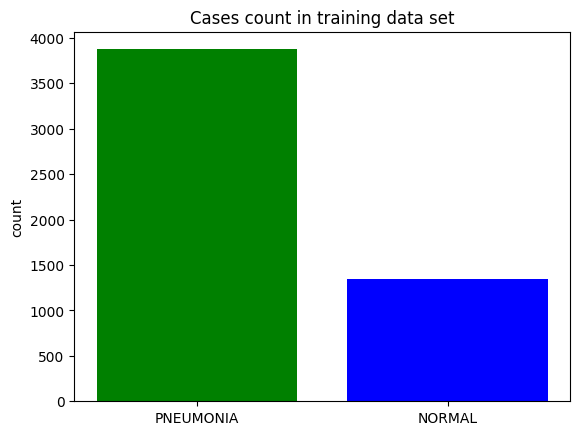

In [7]:
plt.bar(labels, [len(negatives), len(positives)], color=["green", "blue"])
plt.title("Cases count in training data set")
plt.ylabel("count")
plt.show()

**The data seems imbalanced . To increase the no. of training examples, we will use data augmentation**

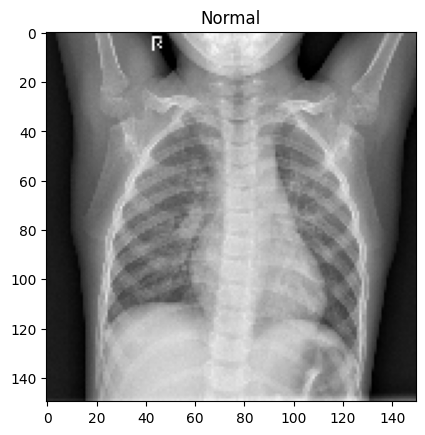

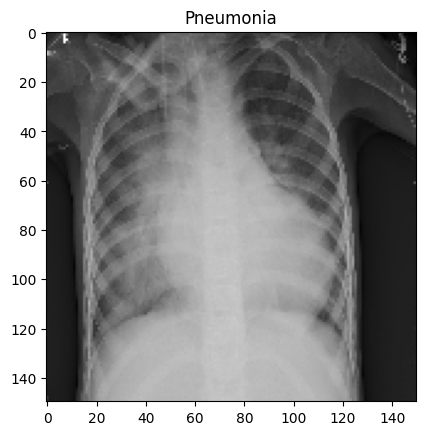

In [98]:
plt.imshow(positives[0],cmap='gray')
plt.title("Normal")
plt.show()

plt.imshow(negatives[4], cmap="gray")
plt.title("Pneumonia")
plt.show()


**We perform a grayscale normalization to reduce the effect of illumination's differences.Moreover the CNN converges faster on [0..1] data than on [0..255].**

In [9]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

**Resizing the data for CNN training and testing**

In [10]:
# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [11]:
x_test[0].shape

(150, 150, 1)

In [12]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
y_val = y_val.reshape(-1,1)

## Data augmentation

In order to avoid overfitting problem, we can expand artificially our dataset. This can be done by altering the training data with small transformations to reproduce the variations. 

Some popular augmentations people use are grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, and much more. By applying just a couple of these transformations to our training data, we can easily double or triple the number of training examples and create a very robust model.

In [13]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

For the data augmentation, i choosed to :
1. Randomly rotate some training images by 30 degrees 
2. Randomly Zoom by 20% some training images
3. Randomly shift images horizontally by 10% of the width 
4. Randomly shift images vertically by 10% of the height 
5. Randomly flip images horizontally.
Once our model is ready, we fit the training dataset.

In [14]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 75, 75, 64)       2

In [15]:
model.compile(optimizer = "rmsprop" , 
            loss = 'binary_crossentropy' , 
            metrics = ['accuracy'])

In [16]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience = 2, 
                                            verbose=1,
                                            factor=0.3, 
                                            min_lr=0.000001)

In [17]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,
                    epochs = 10 , 
                    validation_data = datagen.flow(x_val, y_val) ,
                    callbacks = learning_rate_reduction)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Inconsistent ASTs detected. This is a bug. Cause: 
inconsistent values for field args: [<gast.gast.Name object at 0x000001EB0E19A8C0>] and []Diff:
*** Original nodes

--- Reparsed nodes

***************

*** 30,68 ****

  | | | ]
  | | | value=Constant:
  | | | | value=None
  | | | | kind=None
  | | FunctionDef:
  | | | name=u"inner_factory"
  | | | args=arguments:
! | | | | args=[
  | | | | | Name:
  | | | | | | id=u"ag__"
  | | | | | | ctx=Param()
  | | | | | | annotation=None
  | | | | | | type_comment=None
  | | | | ]
- | | | | posonlyargs=[]
  | | | | vararg=None
  | | | | kwonlyargs=[]
  | | | | kw_defaults=[]
  | | | | kwarg=None
  | | | | defaults=[]
  | | | body=[
  | | | | FunctionDef:
  | | | | | name=u"tf__train_function"
  | | | | | args=arguments:
! | | | | | | args=[
  | | | | | | | Name:
  | | |

In [18]:
model.save('new_model.h5')

In [2]:
# import keras
# model = keras.models.load_model('my_model.h5')

### Evaluation Metrics

In [20]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 4s 208ms/step - loss: 0.3460 - accuracy: 0.8574
Loss of the model is -  0.34596124291419983
20/20 [==============================] - 4s 194ms/step - loss: 0.3460 - accuracy: 0.8574
Accuracy of the model is -  85.73718070983887 %


# Analysis after Model Training

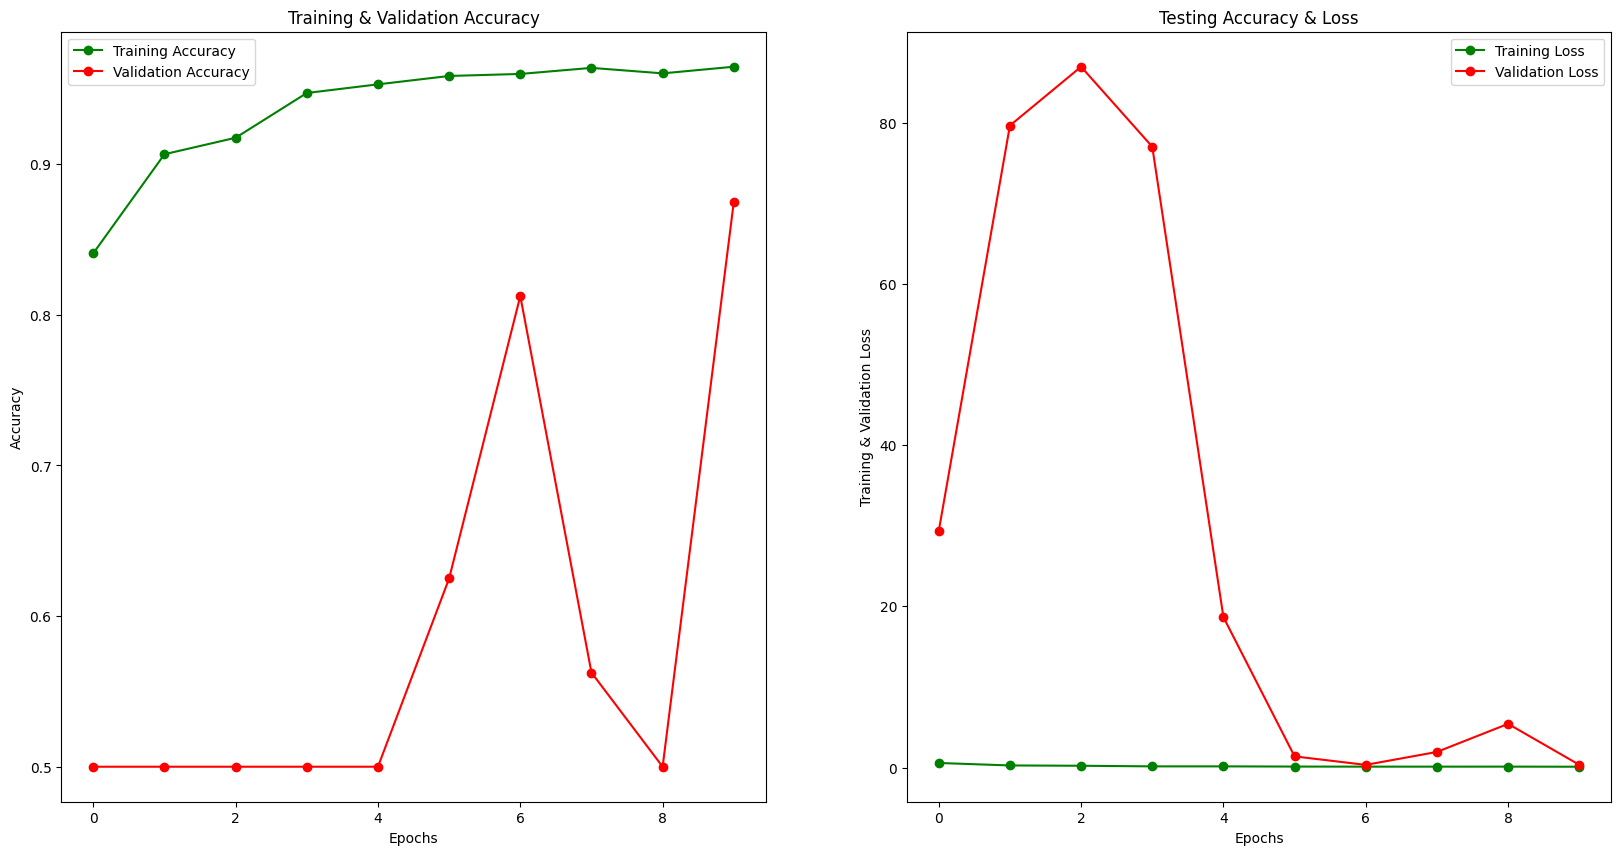

In [21]:
epochs = list(range(10))
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [22]:
predictions = model.predict(x_test) 
for i in range(len(predictions)): 
    predictions[i] = 1 if predictions[i]>0.5 else 0

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Inconsistent ASTs detected. This is a bug. Cause: 
inconsistent values for field args: [<gast.gast.Name object at 0x000001EB15BDA110>] and []Diff:
*** Original nodes

--- Reparsed nodes

***************

*** 30,68 ****

  | | | ]
  | | | value=Constant:
  | | | | value=None
  | | | | kind=None
  | | FunctionDef:
  | | | name=u"inner_factory"
  | | | args=arguments:
! | | | | args=[
  | | | | | Name:
  | | | | | | id=u"ag__"
  | | | | | | ctx=Param()
  | | | | | | annotation=None
  | | | | | | type_comment=None
  | | | | ]
- | | | | posonlyargs=[]
  | | | | vararg=None
  | | | | kwonlyargs=[]
  | | | | kw_defaults=[]
  | | | | kwarg=None
  | | | | defaults=[]
  | | | body=[
  | | | | FunctionDef:
  | | | | | name=u"tf__predict_function"
  | | | | | args=arguments:
! | | | | | | args=[
  | | | | | | | Name:
  | | | | | | | 

In [23]:
print(classification_report(y_test, 
                            predictions, 
                            target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.96      0.81      0.88       390
   Normal (Class 1)       0.75      0.94      0.83       234

           accuracy                           0.86       624
          macro avg       0.85      0.87      0.85       624
       weighted avg       0.88      0.86      0.86       624



### Confusion Matrix

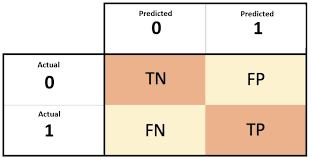

In [24]:
cm = confusion_matrix(y_test,predictions)
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
cm

,0,1
0,315,75
1,14,220


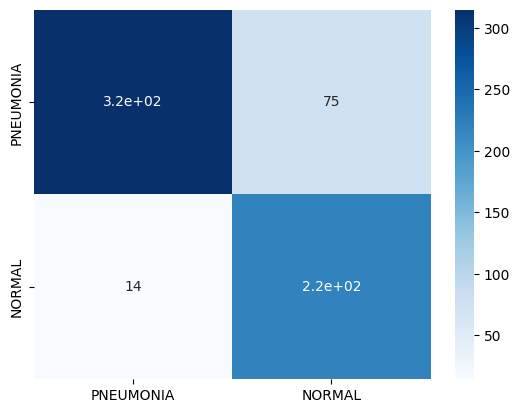

In [25]:
sns.heatmap(cm, cmap="Blues", annot=True, xticklabels = labels,yticklabels = labels)
plt.show()

In [ ]:
# def pneumoniaPrediction(img):
#     img= cv2.imread(img, cv2.IMREAD_GRAYSCALE)
#     img = cv2.resize(img, (150, 150))
#     img = img.reshape(-1, 150, 150, 1)
#     isPneumonic = model.predict(img)[0]
#     imgClass = "Pneumonic" if isPneumonic<0.5 else "Normal"
#     return imgClass
from PIL import Image
def pneumoniaPrediction(img):
    img = Image.open(img)
    img = img.resize((150,150))
    img = np.array(img)/255
    img = img.reshape(-1, 150, 150, 1)
    isPneumonic = model.predict(img)[0]
    imgClass = "Pneumonic" if isPneumonic<0.5 else "Normal"
    return imgClass

In [2]:


from tkinter import Tk    
from tkinter.filedialog import askopenfilename
import os
cur_path=os.cwd()
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename(initialdir = cur_path,
										title = "Select an Image File",
										filetypes = (("Image Files",
														"*.png *.jpg *.jpeg"),
													("all files",
														"*.*"))) # show an "Open" dialog box and return the path to the selected file

print(pneumoniaPrediction(filename))